In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
plt.rcParams["figure.figsize"] = (15,10)
mpl.rcParams['font.size'] = 16  # Set the font size for all elements

sns.set(style="darkgrid")
sns.set_context(rc={"xtick.labelsize":12,"axes.labelsize":15})
plt.rcParams["figure.figsize"] = (20,3)

In [2]:
def fix_index(df):
    df["Time"]=df["Unnamed: 0"]
    df = df.drop(columns=["Unnamed: 0"])
    df["Time"] = pd.to_datetime(df["Time"])
    df = df.set_index("Time")
    return df

In [3]:
h16_cluster1        = pd.read_csv("P2P_results/DP_results/h16_cluster1.csv")
h16_cluster2        = pd.read_csv("P2P_results/DP_results/h16_cluster2.csv")
h16_cluster2_winter = pd.read_csv("P2P_results/DP_results/h16_cluster2_winter.csv")
h22_cluster2        = pd.read_csv("P2P_results/DP_results/h22_cluster2.csv")
h22_cluster2_winter = pd.read_csv("P2P_results/DP_results/h22_cluster2_winter.csv")
h28_cluster1        = pd.read_csv("P2P_results/DP_results/h28_cluster1.csv")
h28_cluster2        = pd.read_csv("P2P_results/DP_results/h28_cluster2.csv")
h28_cluster2_winter = pd.read_csv("P2P_results/DP_results/h28_cluster2_winter.csv")

h16_cluster1        = fix_index(h16_cluster1)
h16_cluster2        = fix_index(h16_cluster2)
h16_cluster2_winter = fix_index(h16_cluster2_winter)
h22_cluster2        = fix_index(h22_cluster2)
h22_cluster2_winter = fix_index(h22_cluster2_winter)
h28_cluster1        = fix_index(h28_cluster1)
h28_cluster2        = fix_index(h28_cluster2)
h28_cluster2_winter = fix_index(h28_cluster2_winter)

# DP

## Charge/Discharge plots

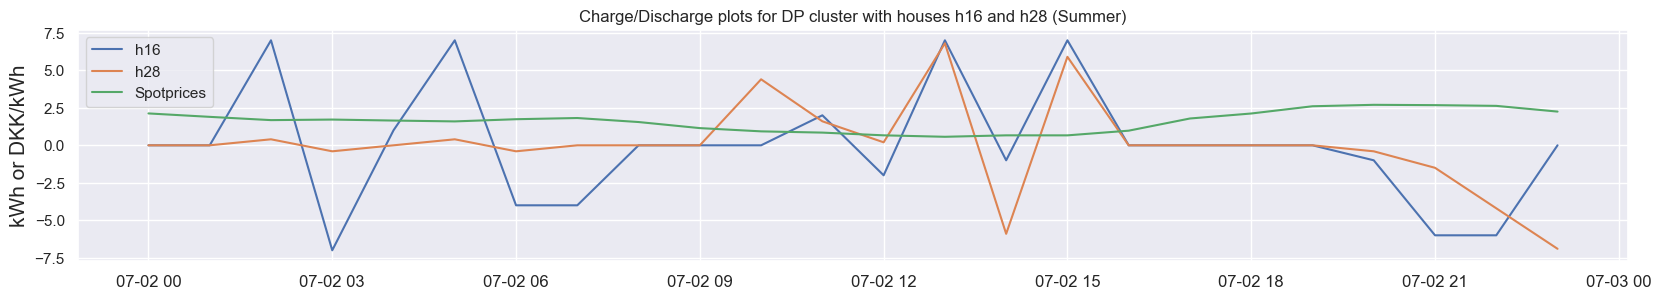

In [4]:
plt.rcParams["figure.figsize"] = (20,3)

plt.plot(h16_cluster1["charge"])
plt.plot(h28_cluster1["charge"])
plt.plot(h28_cluster1["SpotPriceDKK"]/1000)
plt.ylabel("kWh or DKK/kWh")
plt.title("Charge/Discharge plots for DP cluster with houses h16 and h28 (Summer)")
plt.legend(["h16","h28","Spotprices"])
plt.savefig("Charge_DP_cluster1_summer.png", bbox_inches = 'tight')
plt.show()

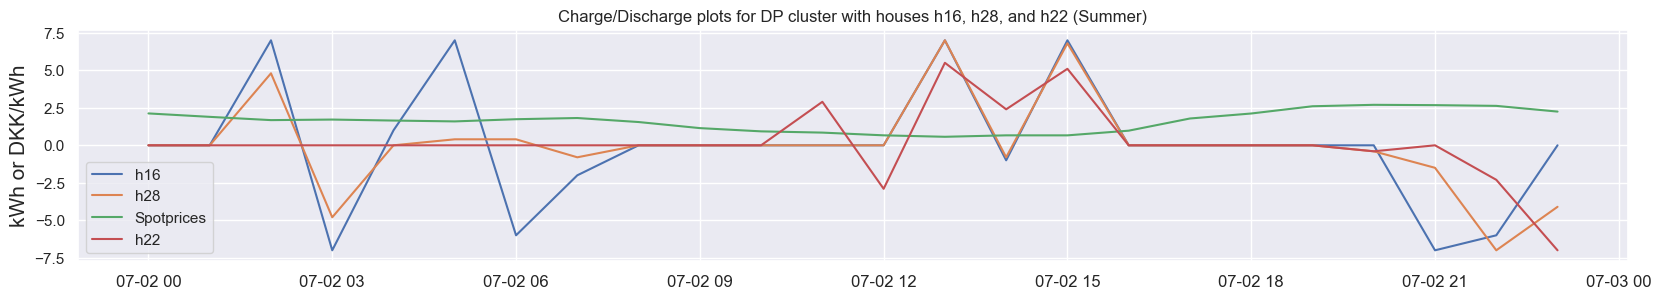

In [5]:
plt.rcParams["figure.figsize"] = (20,3)

plt.plot(h16_cluster2["charge"])
plt.plot(h28_cluster2["charge"])
plt.plot(h22_cluster2["SpotPriceDKK"]/1000)
plt.plot(h22_cluster2["charge"])
plt.ylabel("kWh or DKK/kWh")
plt.title("Charge/Discharge plots for DP cluster with houses h16, h28, and h22 (Summer)")
plt.legend(["h16","h28","Spotprices","h22"])
plt.savefig("Charge_DP_cluster2_summer.png", bbox_inches = 'tight')
plt.show()

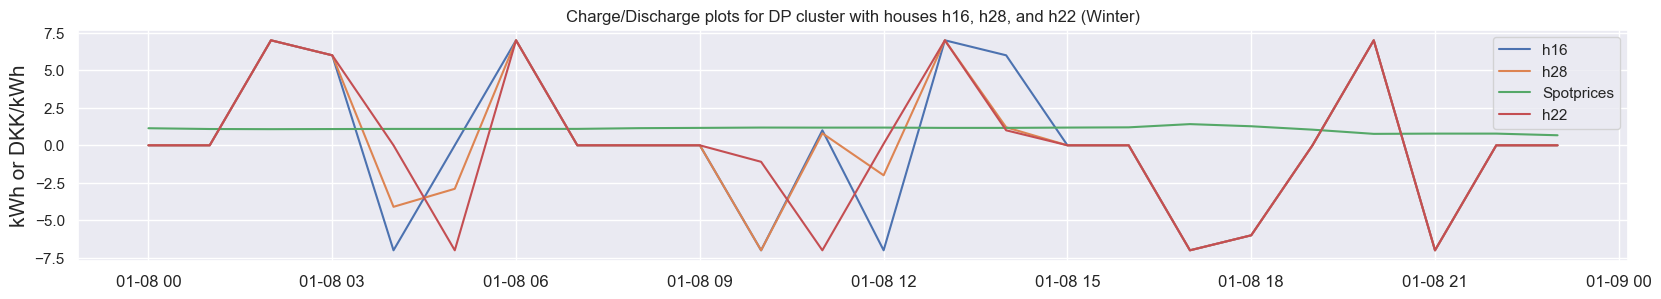

In [6]:
plt.rcParams["figure.figsize"] = (20,3)

plt.plot(h16_cluster2_winter["charge"])
plt.plot(h28_cluster2_winter["charge"])
plt.plot(h22_cluster2_winter["SpotPriceDKK"]/1000)
plt.plot(h22_cluster2_winter["charge"])
plt.ylabel("kWh or DKK/kWh")
plt.title("Charge/Discharge plots for DP cluster with houses h16, h28, and h22 (Winter)")
plt.legend(["h16","h28","Spotprices","h22"])
plt.savefig("Charge_DP_cluster2_winter.png", bbox_inches = 'tight')
plt.show()

## Total cost/emissions

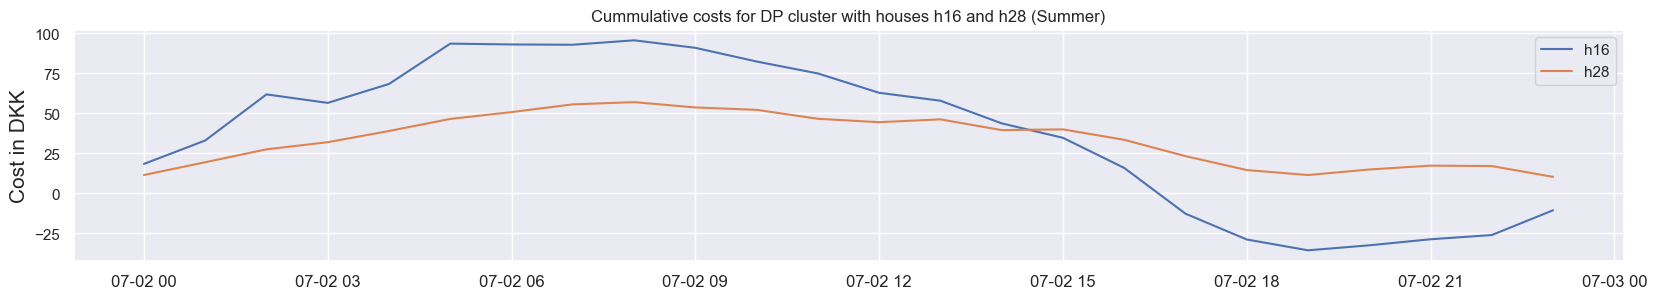

In [9]:
plt.rcParams["figure.figsize"] = (20,3)
fig, ax = plt.subplots(1, 1, sharex=True)

ax.plot(h16_cluster1["cost_cummulative"])
ax.plot(h28_cluster1["cost_cummulative"])
ax.set_ylabel("Cost in DKK")
ax.title.set_text("Cummulative costs for DP cluster with houses h16 and h28 (Summer)")
ax.legend(["h16","h28"])

plt.savefig("Totals_DP_cluster1_summer.png", bbox_inches = 'tight')
plt.show()

In [25]:
print(h16_cluster1["cost_cummulative"][-1])
print(h28_cluster1["cost_cummulative"][-1])

-10.490613283800007
10.395008573000004


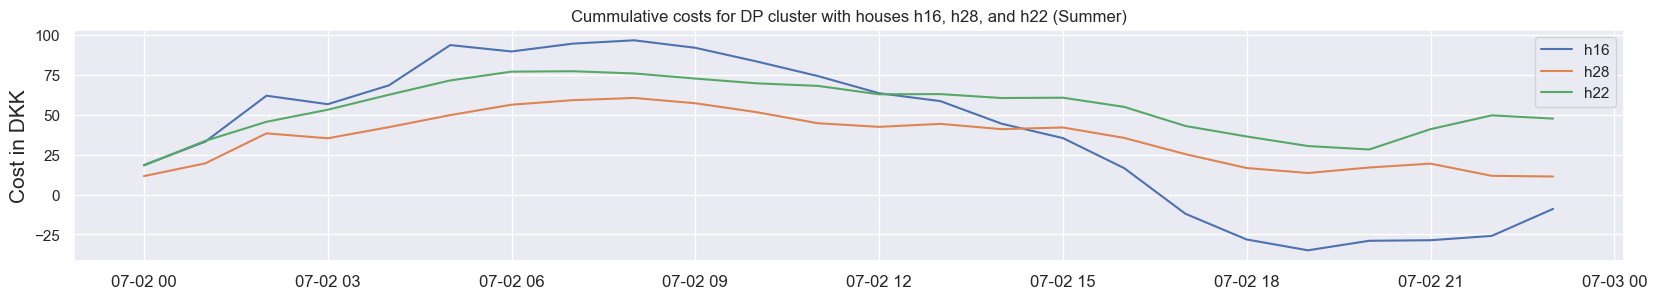

In [10]:
plt.rcParams["figure.figsize"] = (20,3)
fig, ax = plt.subplots(1, 1, sharex=True)

ax.plot(h16_cluster2["cost_cummulative"])
ax.plot(h28_cluster2["cost_cummulative"])
ax.plot(h22_cluster2["cost_cummulative"])
ax.set_ylabel("Cost in DKK")
ax.title.set_text("Cummulative costs for DP cluster with houses h16, h28, and h22 (Summer)")
ax.legend(["h16","h28","h22"])

plt.savefig("Totals_DP_cluster2_summer.png", bbox_inches = 'tight')
plt.show()

In [26]:
print(h16_cluster2["cost_cummulative"][-1])
print(h28_cluster2["cost_cummulative"][-1])
print(h22_cluster2["cost_cummulative"][-1])

-8.995213357800026
11.2828362123
47.57580470820002


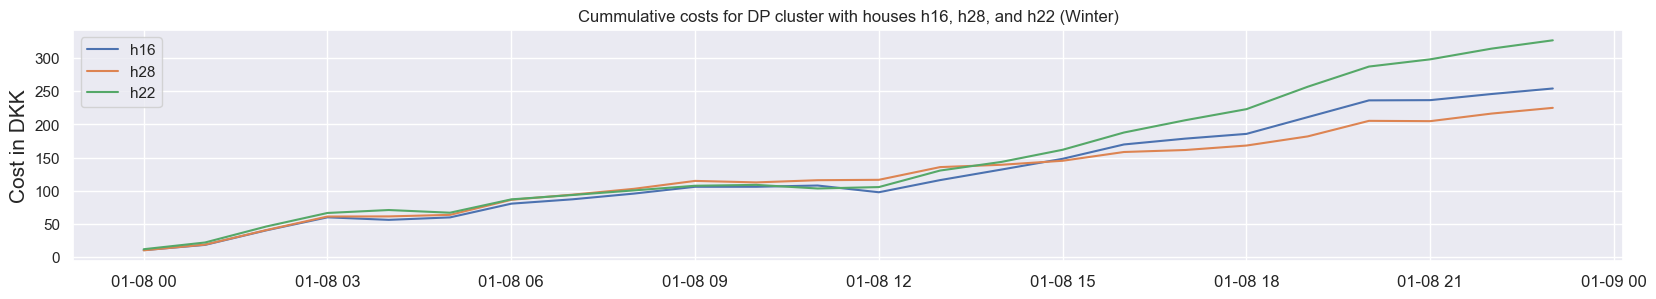

In [12]:
plt.rcParams["figure.figsize"] = (20,3)
fig, ax = plt.subplots(1, 1, sharex=True)

ax.plot(h16_cluster2_winter["cost_cummulative"])
ax.plot(h28_cluster2_winter["cost_cummulative"])
ax.plot(h22_cluster2_winter["cost_cummulative"])
ax.set_ylabel("Cost in DKK")
ax.title.set_text("Cummulative costs for DP cluster with houses h16, h28, and h22 (Winter)")
ax.legend(["h16","h28","h22"])

plt.savefig("Totals_DP_cluster2_winter.png", bbox_inches = 'tight')
plt.show()

In [35]:
print(h16_cluster2_winter["cost_cummulative"][-1])
print(h28_cluster2_winter["cost_cummulative"][-1])
print(h22_cluster2_winter["cost_cummulative"][-1])

254.1282509153
224.9481794889
326.77684325530004


# MPC

In [10]:
def fix_index_mpc(df):
    df = df.drop(columns=["Unnamed: 0"])
    df["time"] = pd.to_datetime(df["time"])
    df = df.set_index("time")
    return df

In [11]:
cost_nonpareto_cluster1      = pd.read_csv("P2P_results/MPC_results/cost_nonpareto_cluster1.csv")
cost_nonpareto_cluster2      = pd.read_csv("P2P_results/MPC_results/cost_nonpareto_cluster2.csv")
grid_nonpareto_cluster1      = pd.read_csv("P2P_results/MPC_results/grid_nonpareto_cluster1.csv")
grid_nonpareto_cluster2      = pd.read_csv("P2P_results/MPC_results/grid_nonpareto_cluster2.csv")
grid_pareto_cluster1         = pd.read_csv("P2P_results/MPC_results/grid_pareto_cluster1.csv")
grid_pareto_cluster2         = pd.read_csv("P2P_results/MPC_results/grid_pareto_cluster2.csv")
grid_pareto_cluster2_winter  = pd.read_csv("P2P_results/MPC_results/grid_pareto_cluster2_winter.csv")
perfect_grid_pareto_cluster2 = pd.read_csv("P2P_results/MPC_results/perfect_grid_pareto_cluster2.csv")

cost_nonpareto_cluster1      = fix_index_mpc(cost_nonpareto_cluster1)
cost_nonpareto_cluster2      = fix_index_mpc(cost_nonpareto_cluster2)
grid_nonpareto_cluster1      = fix_index_mpc(grid_nonpareto_cluster1)
grid_nonpareto_cluster2      = fix_index_mpc(grid_nonpareto_cluster2)
grid_pareto_cluster1         = fix_index_mpc(grid_pareto_cluster1)
grid_pareto_cluster2         = fix_index_mpc(grid_pareto_cluster2)
grid_pareto_cluster2_winter  = fix_index_mpc(grid_pareto_cluster2_winter)
perfect_grid_pareto_cluster2 = fix_index_mpc(perfect_grid_pareto_cluster2)

## Charge/Discharge plots

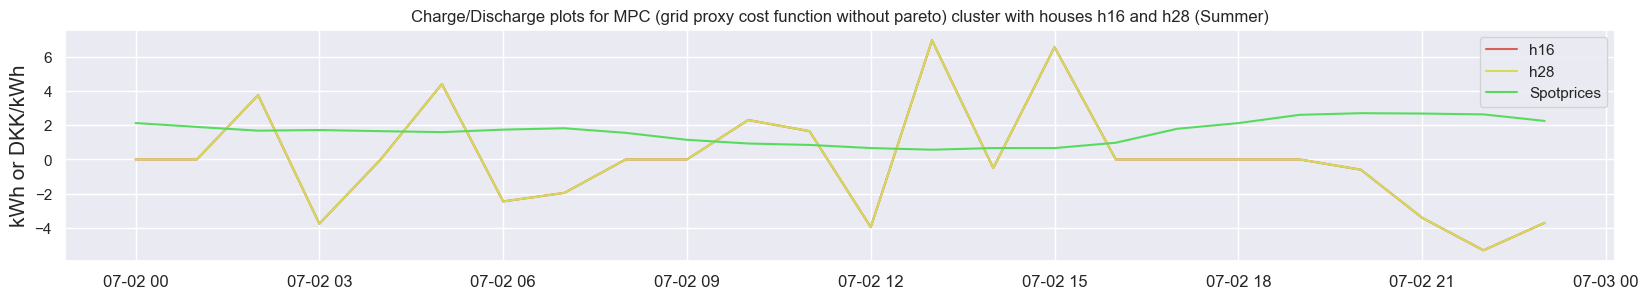

In [12]:
plt.rcParams["figure.figsize"] = (20,3)
sns.set_palette('hls')

plt.plot(grid_nonpareto_cluster1["charge_h16"])
plt.plot(grid_nonpareto_cluster1["charge_h28"])
plt.plot(grid_nonpareto_cluster1["price"])
plt.ylabel("kWh or DKK/kWh")
plt.title("Charge/Discharge plots for MPC (grid proxy cost function without pareto) cluster with houses h16 and h28 (Summer)")
plt.legend(["h16","h28","Spotprices"])
plt.savefig("Charge_MPC_grid_non_cluster1_summer.png", bbox_inches = 'tight')
plt.show()

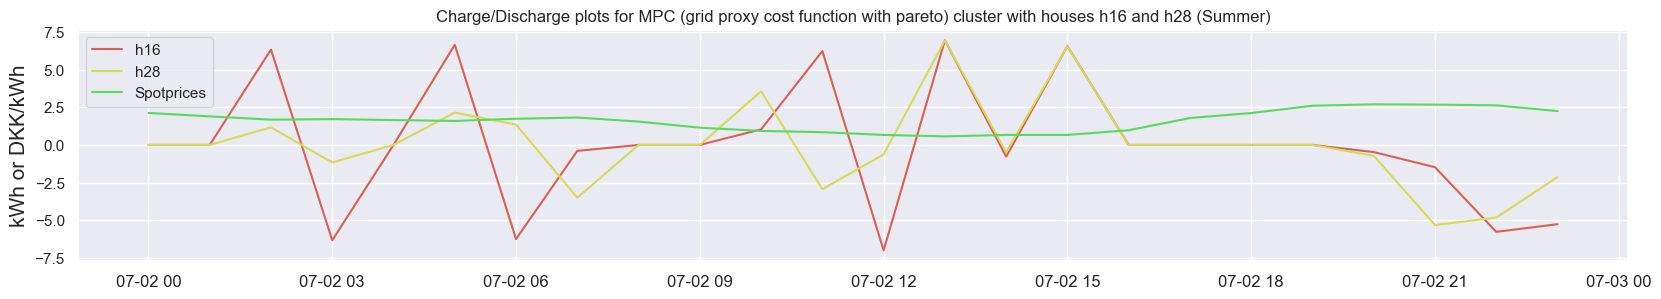

In [13]:
plt.rcParams["figure.figsize"] = (20,3)
sns.set_palette('hls')

plt.plot(grid_pareto_cluster1["charge_h16"])
plt.plot(grid_pareto_cluster1["charge_h28"])
plt.plot(grid_pareto_cluster1["price"])
plt.ylabel("kWh or DKK/kWh")
plt.title("Charge/Discharge plots for MPC (grid proxy cost function with pareto) cluster with houses h16 and h28 (Summer)")
plt.legend(["h16","h28","Spotprices"])
plt.savefig("Charge_MPC_grid_par_cluster1_summer.png", bbox_inches = 'tight')
plt.show()

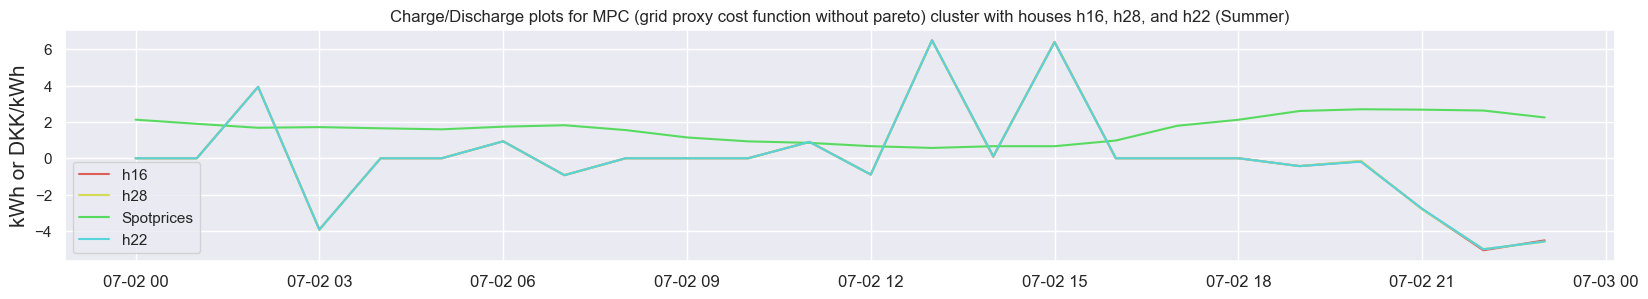

In [14]:
plt.rcParams["figure.figsize"] = (20,3)
sns.set_palette('hls')

plt.plot(grid_nonpareto_cluster2["charge_h16"])
plt.plot(grid_nonpareto_cluster2["charge_h28"])
plt.plot(grid_nonpareto_cluster2["price"])
plt.plot(grid_nonpareto_cluster2["charge_h22"])
plt.ylabel("kWh or DKK/kWh")
plt.title("Charge/Discharge plots for MPC (grid proxy cost function without pareto) cluster with houses h16, h28, and h22 (Summer)")
plt.legend(["h16","h28","Spotprices","h22"])
plt.savefig("Charge_MPC_grid_non_cluster2_summer.png", bbox_inches = 'tight')
plt.show()

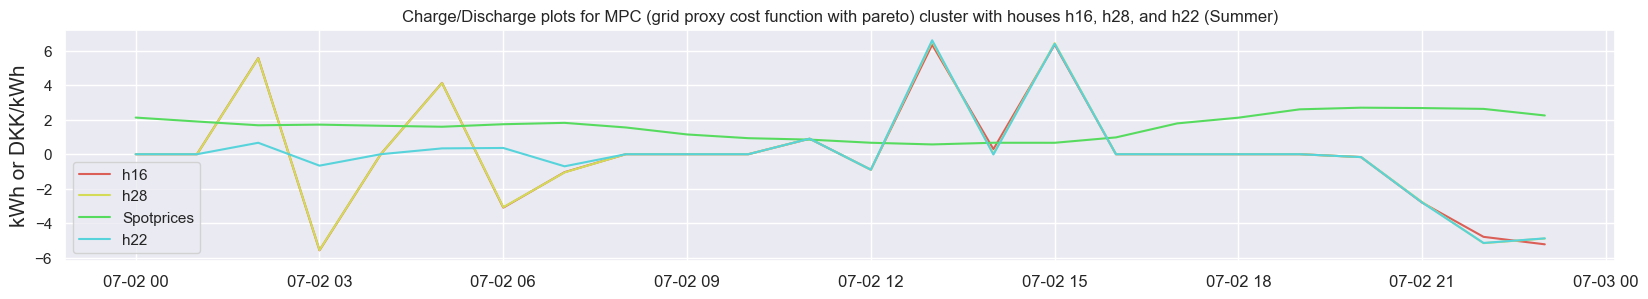

In [15]:
plt.rcParams["figure.figsize"] = (20,3)
sns.set_palette('hls')

plt.plot(grid_pareto_cluster2["charge_h16"])
plt.plot(grid_pareto_cluster2["charge_h28"])
plt.plot(grid_pareto_cluster2["price"])
plt.plot(grid_pareto_cluster2["charge_h22"])
plt.ylabel("kWh or DKK/kWh")
plt.title("Charge/Discharge plots for MPC (grid proxy cost function with pareto) cluster with houses h16, h28, and h22 (Summer)")
plt.legend(["h16","h28","Spotprices","h22"])
plt.savefig("Charge_MPC_grid_par_cluster2_summer.png", bbox_inches = 'tight')
plt.show()

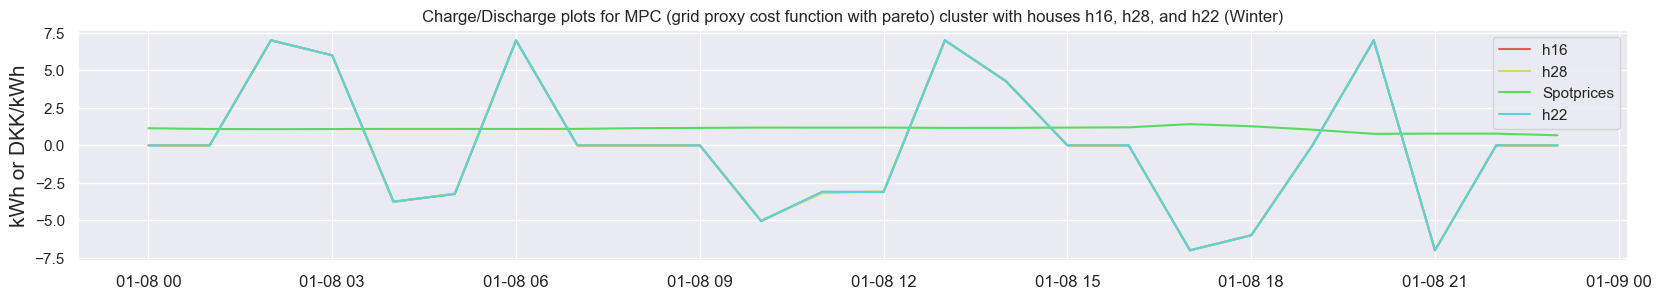

In [16]:
plt.rcParams["figure.figsize"] = (20,3)
sns.set_palette('hls')

plt.plot(grid_pareto_cluster2_winter["charge_h16"])
plt.plot(grid_pareto_cluster2_winter["charge_h28"])
plt.plot(grid_pareto_cluster2_winter["price"])
plt.plot(grid_pareto_cluster2_winter["charge_h22"])
plt.ylabel("kWh or DKK/kWh")
plt.title("Charge/Discharge plots for MPC (grid proxy cost function with pareto) cluster with houses h16, h28, and h22 (Winter)")
plt.legend(["h16","h28","Spotprices","h22"])
plt.savefig("Charge_MPC_grid_par_cluster2_winter.png", bbox_inches = 'tight')
plt.show()

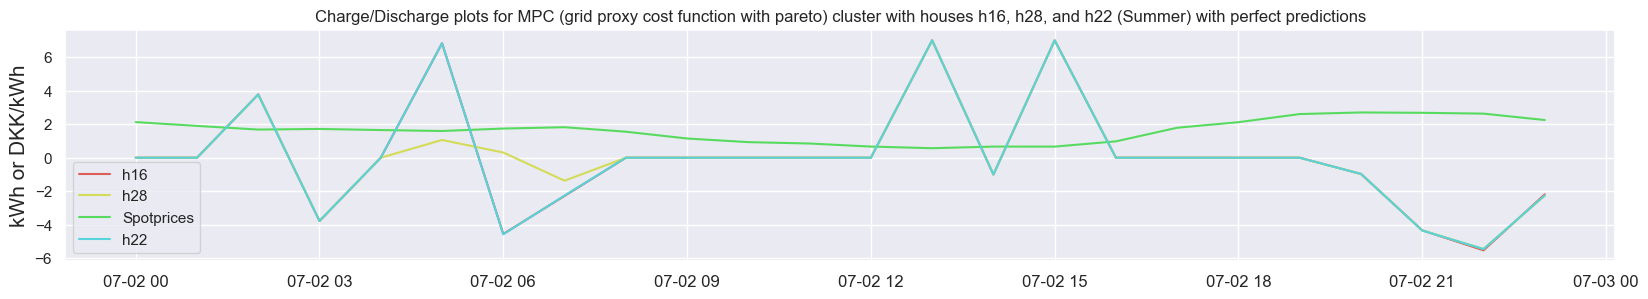

In [17]:
plt.rcParams["figure.figsize"] = (20,3)
sns.set_palette('hls')

plt.plot(perfect_grid_pareto_cluster2["charge_h16"])
plt.plot(perfect_grid_pareto_cluster2["charge_h28"])
plt.plot(perfect_grid_pareto_cluster2["price"])
plt.plot(perfect_grid_pareto_cluster2["charge_h22"])
plt.ylabel("kWh or DKK/kWh")
plt.title("Charge/Discharge plots for MPC (grid proxy cost function with pareto) cluster with houses h16, h28, and h22 (Summer) with perfect predictions")
plt.legend(["h16","h28","Spotprices","h22"])
plt.savefig("Charge_MPC_grid_par_cluster2_summer_perf.png", bbox_inches = 'tight')
plt.show()

## Total cost/emissions

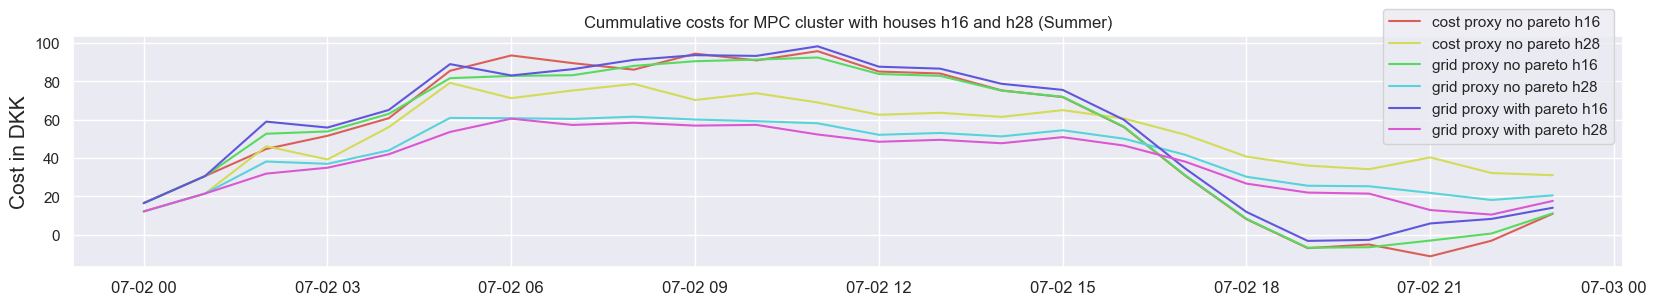

In [18]:
plt.rcParams["figure.figsize"] = (20,3)
sns.set_palette('hls')

plt.plot(cost_nonpareto_cluster1["cumm_actual_cost_h16"])
plt.plot(cost_nonpareto_cluster1["cumm_actual_cost_h28"])
plt.plot(grid_nonpareto_cluster1["cumm_actual_cost_h16"])
plt.plot(grid_nonpareto_cluster1["cumm_actual_cost_h28"])
plt.plot(grid_pareto_cluster1["cumm_actual_cost_h16"])
plt.plot(grid_pareto_cluster1["cumm_actual_cost_h28"])
plt.ylabel("Cost in DKK")
plt.title("Cummulative costs for MPC cluster with houses h16 and h28 (Summer)")
plt.legend(["cost proxy no pareto h16","cost proxy no pareto h28",
            "grid proxy no pareto h16","grid proxy no pareto h28",
            "grid proxy with pareto h16","grid proxy with pareto h28"],bbox_to_anchor=(0.84, 0.5))
plt.savefig("Totals_MPC_cluster1_summer.png", bbox_inches = 'tight')
plt.show()

In [32]:
print(cost_nonpareto_cluster1["cumm_actual_cost_h16"][-1])
print(cost_nonpareto_cluster1["cumm_actual_cost_h28"][-1])
print()
print(grid_nonpareto_cluster1["cumm_actual_cost_h16"][-1])
print(grid_nonpareto_cluster1["cumm_actual_cost_h28"][-1])
print()
print(grid_pareto_cluster1["cumm_actual_cost_h16"][-1])
print(grid_pareto_cluster1["cumm_actual_cost_h28"][-1])
print()

10.945882900726517
31.04347290060844

11.158826069528205
20.5125644950282

14.060722166988796
17.610728116377537



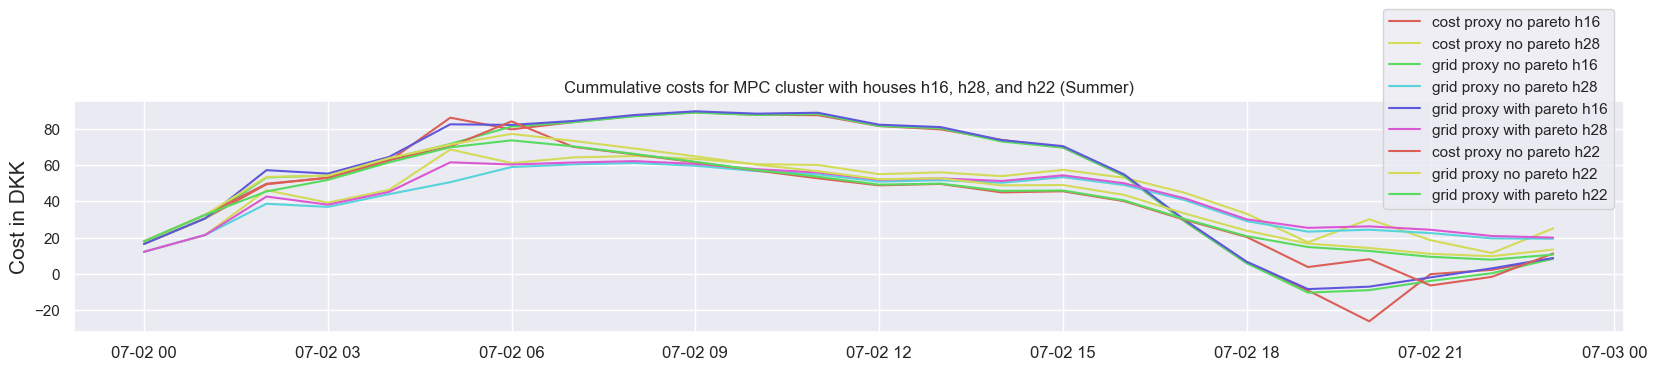

In [19]:
plt.rcParams["figure.figsize"] = (20,3)
sns.set_palette('hls')

plt.plot(cost_nonpareto_cluster2["cumm_actual_cost_h16"])
plt.plot(cost_nonpareto_cluster2["cumm_actual_cost_h28"])

plt.plot(grid_nonpareto_cluster2["cumm_actual_cost_h16"])
plt.plot(grid_nonpareto_cluster2["cumm_actual_cost_h28"])

plt.plot(grid_pareto_cluster2["cumm_actual_cost_h16"])
plt.plot(grid_pareto_cluster2["cumm_actual_cost_h28"])

plt.plot(cost_nonpareto_cluster2["cumm_actual_cost_h22"])
plt.plot(grid_nonpareto_cluster2["cumm_actual_cost_h22"])
plt.plot(grid_pareto_cluster2["cumm_actual_cost_h22"])
plt.ylabel("Cost in DKK")
plt.title("Cummulative costs for MPC cluster with houses h16, h28, and h22 (Summer)")
plt.legend(["cost proxy no pareto h16","cost proxy no pareto h28",
            "grid proxy no pareto h16","grid proxy no pareto h28",
            "grid proxy with pareto h16","grid proxy with pareto h28","cost proxy no pareto h22",
            "grid proxy no pareto h22","grid proxy with pareto h22"],bbox_to_anchor=(0.84, 0.5))
plt.savefig("Totals_MPC_cluster2_summer.png", bbox_inches = 'tight')
plt.show()

In [33]:
print(cost_nonpareto_cluster2["cumm_actual_cost_h16"][-1])
print(cost_nonpareto_cluster2["cumm_actual_cost_h28"][-1])
print(cost_nonpareto_cluster2["cumm_actual_cost_h22"][-1])
print()
print(grid_nonpareto_cluster2["cumm_actual_cost_h16"][-1])
print(grid_nonpareto_cluster2["cumm_actual_cost_h28"][-1])
print(grid_nonpareto_cluster2["cumm_actual_cost_h22"][-1])
print()
print(grid_pareto_cluster2["cumm_actual_cost_h16"][-1])
print(grid_pareto_cluster2["cumm_actual_cost_h28"][-1])
print(grid_pareto_cluster2["cumm_actual_cost_h22"][-1])
print()

8.308084108565886
25.00188659774968
11.203910887212782

8.367288542006039
19.33583473204375
13.365907174017108

8.744317750177643
19.96864182747423
10.582505170744032



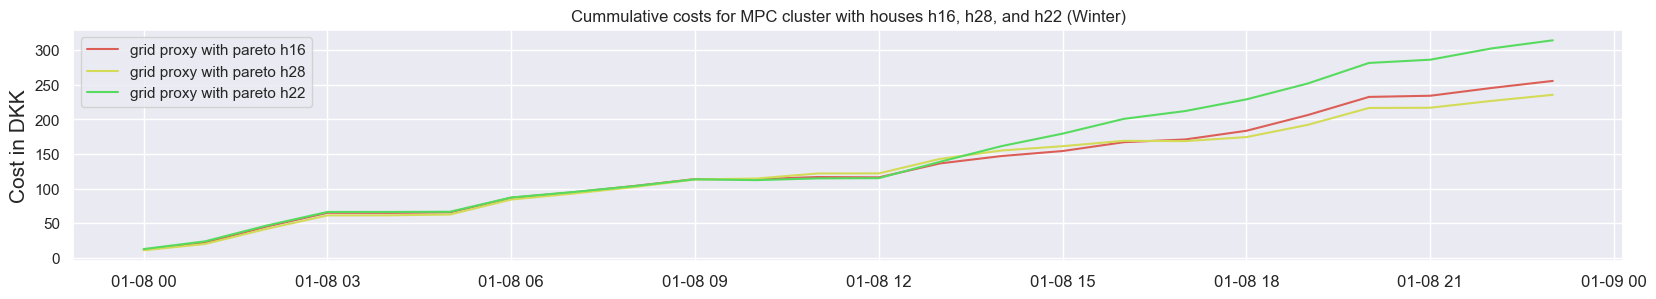

In [20]:
plt.rcParams["figure.figsize"] = (20,3)
sns.set_palette('hls')

plt.plot(grid_pareto_cluster2_winter["cumm_actual_cost_h16"])
plt.plot(grid_pareto_cluster2_winter["cumm_actual_cost_h28"])
plt.plot(grid_pareto_cluster2_winter["cumm_actual_cost_h22"])
plt.ylabel("Cost in DKK")
plt.title("Cummulative costs for MPC cluster with houses h16, h28, and h22 (Winter)")
plt.legend(["grid proxy with pareto h16","grid proxy with pareto h28",
            "grid proxy with pareto h22"])
plt.savefig("Totals_MPC_cluster2_winter.png", bbox_inches = 'tight')
plt.show()

In [37]:
print(grid_pareto_cluster2_winter["cumm_actual_cost_h16"][-1])
print(grid_pareto_cluster2_winter["cumm_actual_cost_h28"][-1])
print(grid_pareto_cluster2_winter["cumm_actual_cost_h22"][-1])

255.75304543460865
235.64563180324237
314.53626453275547


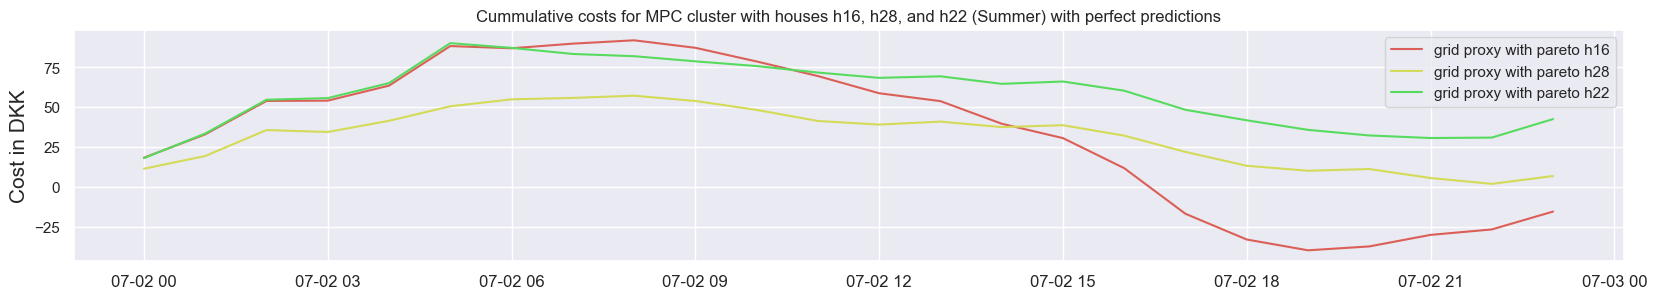

In [21]:
plt.rcParams["figure.figsize"] = (20,3)
sns.set_palette('hls')

plt.plot(perfect_grid_pareto_cluster2["cumm_actual_cost_h16"])
plt.plot(perfect_grid_pareto_cluster2["cumm_actual_cost_h28"])
plt.plot(perfect_grid_pareto_cluster2["cumm_actual_cost_h22"])
plt.ylabel("Cost in DKK")
plt.title("Cummulative costs for MPC cluster with houses h16, h28, and h22 (Summer) with perfect predictions")
plt.legend(["grid proxy with pareto h16","grid proxy with pareto h28",
            "grid proxy with pareto h22"])
plt.savefig("Totals_MPC_cluster2_summer_perf.png", bbox_inches = 'tight')
plt.show()

In [34]:
print(perfect_grid_pareto_cluster2["cumm_actual_cost_h16"][-1])
print(perfect_grid_pareto_cluster2["cumm_actual_cost_h28"][-1])
print(perfect_grid_pareto_cluster2["cumm_actual_cost_h22"][-1])
print()

-15.278327228459592
6.998070352264554
42.67390738374999

